First things first, lets add Streamlit support. 
In order to use streamlit in a jupyter notebook `streamlit_jupyter` is a neat package to work with. 

We also use `nbdev` to export only relevant cells of notebook to `.py` file

According to the examples provided for the package

+ start the cells you want exported with the `#|export` or `#|exporti` directive
  
+ run `nb_export` to convert the `.ipynb` to `.py`

In [25]:
%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [27]:
# |exporti

# import the neccessary packages
import streamlit as st

from streamlit_jupyter import StreamlitPatcher, tqdm

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import io


In [28]:
sp = StreamlitPatcher()
sp.jupyter() # register patcher with streamlit

In [29]:
# |exporti

st.title("BWF Tournaments")

# BWF Tournaments

In [30]:
# |exporti

st.markdown(f" ## Fetch the data from csv file and store it in a variable.")

 ## Fetch the data from csv file and store it in a variable.

In [31]:
# |exporti

tournaments_df = pd.read_csv('./data/tournaments.csv', index_col=0)

pd.set_option('display.max_colwidth', None)

In [32]:
# |exporti

# To display the output in your Streamlit app, pipe the output of df.info to a buffer instead of sys.stdout, 
# get the buffer content, and display it with st.text like so:
buffer = io.StringIO()
tournaments_df.info(buf=buffer)
df_tournaments_info = buffer.getvalue()

st.text(df_tournaments_info)

```None
<class 'pandas.core.frame.DataFrame'>
Index: 330 entries, Badminton Asia West Asia Regional Junior Championships 2022 (Individual) to VICTOR Oceania Championships 2024
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   organization  330 non-null    object
 1   city          330 non-null    object
 2   country       330 non-null    object
 3   type          254 non-null    object
 4   start_date    330 non-null    object
 5   end_date      330 non-null    object
 6   link          330 non-null    object
dtypes: object(7)
memory usage: 20.6+ KB

```

In [33]:
# |exporti

st.write(tournaments_df.describe())

,organization,city,country,type,start_date,end_date,link
count,330,330,330,254,330,330,330
unique,70,202,89,26,187,117,319
top,Badminton World Federation,Kuala Lumpur,Malaysia,International Challenge,11/8/2022,12/10/2023,/sport/tournament?id=B0AA8448-FEF1-43D7-9B52-EFA216EB8801
freq,79,8,14,43,6,13,2


In [34]:
# |exporti

st.markdown(
"""
As we see the total count for each column other than type is 325. And the total count in Type is only 250. so need to figure out what types are missing and how to fill those or remove those if necessary. 

Aditionally from the original dataset there's no index column. let's start with adding index column to the dataframe. 
"""
)


As we see the total count for each column other than type is 325. And the total count in Type is only 250. so need to figure out what types are missing and how to fill those or remove those if necessary. 

Aditionally from the original dataset there's no index column. let's start with adding index column to the dataframe. 


In [35]:
# |exporti

# add a new integer index column to the dataframe
tournaments_df.reset_index(inplace=True)
tournaments_df = tournaments_df.rename_axis('Index')

In [36]:
# |exporti
st.markdown(f" ### Let's see our dataframe now with a proper index and first 10 results to get a sense of how it's looking")

st.dataframe(tournaments_df.head(10))

 ### Let's see our dataframe now with a proper index and first 10 results to get a sense of how it's looking

,name,organization,city,country,type,start_date,end_date,link
Index,,,,,,,,
0,Badminton Asia West Asia Regional Junior Championships 2022 (Individual),BWF - Badminton Asia Confederation,Jaber Al-Ahmad City,Kuwait,NaN,11/5/2022,11/7/2022,/sport/tournament?id=C1215BDB-83B1-4931-9BF3-0ED6756AA550
1,Badminton Asia West Asia Regional Junior Championships 2022 (Team) -Cancelled,Badminton Asia Confederation,TBC,Kuwait,Grade 1 – Junior Team Tournaments,11/8/2022,11/10/2022,/sport/tournament?id=75E6B18B-4108-4FED-88AE-8743ACB345FC
2,YONEX-SUNRISE Hong Kong Open 2022 (Cancelled),Badminton World Federation,Kowloon,Hong Kong China,HSBC BWF World Tour Super 500,11/8/2022,11/13/2022,/sport/tournament?id=3070A32C-117F-407C-90F1-F71EC3A7514D
3,III Guatemala Future Series 2022,BWF - Federacion Nacional de Badminton de Guatemal,Guatemala,Guatemala,Future Series,11/8/2022,11/13/2022,/sport/tournament?id=9BCD5E7D-D5A9-4FC2-9EBF-CCD119B6E00D
4,PETRONAS Malaysia International Series 2022 (New Dates),BWF - Badminton Association of Malaysia,Ipoh,Malaysia,International Series,11/8/2022,11/13/2022,/sport/tournament?id=B1B0DCD4-9D69-4AA2-B3BB-6AFE5FEC6434
5,Singapore Junior International Series 2022 (Cancelled),BWF - Badminton Asia Confederation,Singapore,Singapore,Junior International Series,11/8/2022,11/13/2022,/sport/tournament?id=93DE3750-7CA7-4528-8423-6F907747268C
6,VICTOR EXIST Junior International Series 2022 (Cancelled),BWF - Badminton Asia Confederation,Jakarta,Indonesia,Junior International Series,11/8/2022,11/13/2022,/sport/tournament?id=F586832E-1B43-4310-93A7-BBA46D9EB02E
7,Turkey U17 Open 2022 (Cancelled),Badminton Europe,Kecioren,Turkiye,NaN,11/10/2022,11/13/2022,/sport/tournament?id=D0662545-19F7-454C-B9F1-55C43CB06B67
8,FZ FORZA Norwegian International 2022,Badminton Europe,Sandefjord,Norway,International Series,11/10/2022,11/13/2022,/sport/tournament?id=FC24903E-7B56-432B-BA88-74DF508B9E56


In [37]:
# |exporti

st.markdown(
"""
Now we have added the proper integier index column let's focus on missing values in `type`.  
"""
)


Now we have added the proper integier index column let's focus on missing values in `type`.  


In [38]:
# |exporti

# find if there's any missing values. 
tournaments_df_nan_values = tournaments_df[tournaments_df.isna().any(axis=1)]

st.markdown(f" ### This following output is the list of values with NaN in the dataframe")
st.dataframe(tournaments_df_nan_values.head())

 ### This following output is the list of values with NaN in the dataframe

,name,organization,city,country,type,start_date,end_date,link
Index,,,,,,,,
0,Badminton Asia West Asia Regional Junior Championships 2022 (Individual),BWF - Badminton Asia Confederation,Jaber Al-Ahmad City,Kuwait,NaN,11/5/2022,11/7/2022,/sport/tournament?id=C1215BDB-83B1-4931-9BF3-0ED6756AA550
7,Turkey U17 Open 2022 (Cancelled),Badminton Europe,Kecioren,Turkiye,NaN,11/10/2022,11/13/2022,/sport/tournament?id=D0662545-19F7-454C-B9F1-55C43CB06B67
17,YONEX Estonian U17 International 2022,Badminton Europe,Tartu,Estonia,NaN,12/9/2022,12/11/2022,/sport/tournament?id=6059B732-1580-42E9-9EA6-2BE7A9E90BE2
33,Swedish Youth Games (U17) 2022,BWF - Swedish Badminton Association,Malmö,Sweden,NaN,11/18/2022,11/20/2022,/sport/tournament?id=2CF79894-967F-4695-829C-16C929133CF6
40,II U17 Portugal Open 2022,BWF - Portugal Badminton Federation,Caldas da Rainha,Portugal,NaN,11/25/2022,11/27/2022,/sport/tournament?id=D8F749CA-31BD-41A1-9FD7-CEF7F43D6741


In [39]:
# |exporti

st.markdown(f'''
after carefully observing the tournament events on BWF tournament software website and learning the event types and tournament structure grading, 
    the missing types are mostly `Grade 3 and Junior` tournaments. 
    https://corporate.bwfbadminton.com/events/    
'''
)



after carefully observing the tournament events on BWF tournament software website and learning the event types and tournament structure grading, 
    the missing types are mostly `Grade 3 and Junior` tournaments. 
    https://corporate.bwfbadminton.com/events/    


In [40]:
# |exporti

# fill missing values with `Grade 3 and Junior`

tournaments_df['type'].fillna('Grade 3 and Junior', inplace=True)

In [41]:
# |exporti

st.markdown(f" ### Now we filled the missing values in `type` with `Grade 3 and Junior`, next let's convert the `start_date` and `end_date` to `datetime64[ns]` Dtype instead of object ")

tournaments_df['start_date'] = pd.to_datetime(tournaments_df['start_date'])
tournaments_df['end_date'] = pd.to_datetime(tournaments_df['end_date'])


 ### Now we filled the missing values in `type` with `Grade 3 and Junior`, next let's convert the `start_date` and `end_date` to `datetime64[ns]` Dtype instead of object 

In [42]:
# |exporti

st.markdown('''
There, now we have all the dataset with `no null` values and the right Dtypes necessary to move further. 
''')


There, now we have all the dataset with `no null` values and the right Dtypes necessary to move further. 


In [43]:
# |exporti

st.markdown(f" lets recheck our dateframe info after the fixes we did to make sure its looking good to proceed")
buffer = io.StringIO()
tournaments_df.info(buf=buffer)
df_tournaments_info = buffer.getvalue()

st.text(df_tournaments_info)

 lets recheck our dateframe info after the fixes we did to make sure its looking good to proceed

```None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   name          330 non-null    object        
 1   organization  330 non-null    object        
 2   city          330 non-null    object        
 3   country       330 non-null    object        
 4   type          330 non-null    object        
 5   start_date    330 non-null    datetime64[ns]
 6   end_date      330 non-null    datetime64[ns]
 7   link          330 non-null    object        
dtypes: datetime64[ns](2), object(6)
memory usage: 20.8+ KB

```

In [44]:
# |exporti

st.markdown(f" ## Processing the variable Countries")

 ## Processing the variable Countries

In [45]:
# |exporti

st.markdown(f" first lets fetch all the unique countries who hosted tournaments")

st.write(tournaments_df['country'].unique())

 first lets fetch all the unique countries who hosted tournaments

array(['Kuwait', 'Hong Kong China', 'Guatemala', 'Malaysia', 'Singapore',
       'Indonesia', 'Turkiye', 'Norway', 'Latvia', 'Thailand', 'China',
       'Canada', 'Bangladesh', 'Malta', 'Estonia', 'Mauritius',
       'Netherlands', 'Poland', 'Switzerland', 'Scotland', 'Bulgaria',
       'Australia', 'Ireland', 'Peru', 'Zambia', 'Czech Republic',
       'Sweden', 'Korea', 'Bahrain', 'New Zealand', 'Mexico', 'Botswana',
       'Slovenia', 'Portugal', 'Slovakia', 'England', 'Cyprus', 'India',
       'Iceland', 'Iran', 'Spain', 'Hungary', 'South Africa', 'France',
       'United Arab Emirates', 'Uganda', 'Italy', 'Germany', 'Vietnam',
       'Japan', 'Israel', 'Belgium', 'Jamaica', 'Luxembourg', 'Austria',
       'Cambodia', 'Kazakhstan', 'Chile', 'Maldives',
       'Northern Mariana Islands', 'Dominican Republic', 'Lithuania',
       'Denmark', 'Mongolia', 'Chinese Taipei', 'Serbia', 'Tunisia',
       'U.S.A.', 'Réunion', 'Tajikistan', 'Argentina', 'Brazil',
       'Paraguay', 'Nepal', 'T

 Creating a bar chart illustrating the frequency of each country hosting a tournament in its home country.

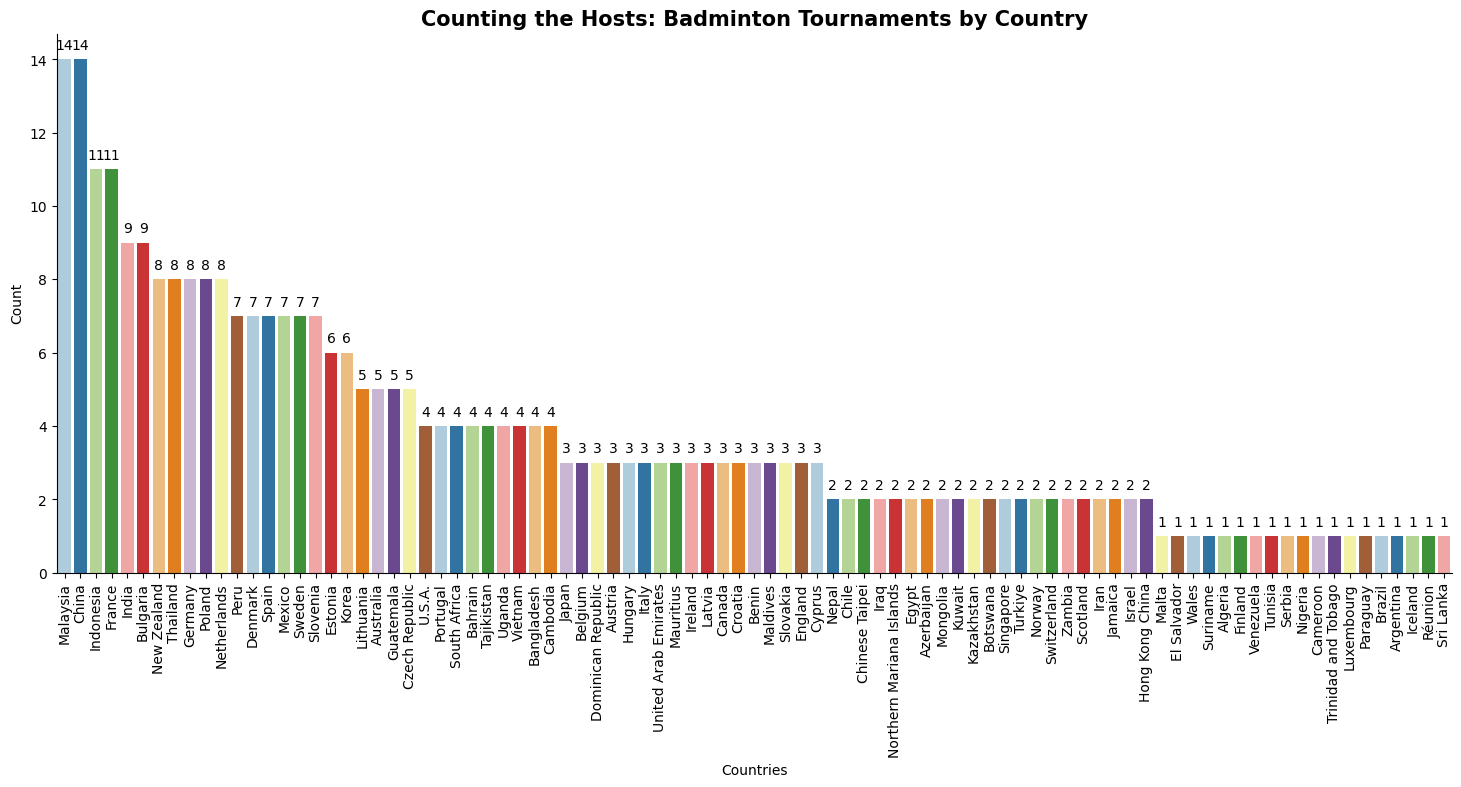

In [46]:
# |exporti

st.markdown(f" Creating a bar chart illustrating the frequency of each country hosting a tournament in its home country.")

# Get the unique counts of each country and store the dataframe in a new variable `all_countries`
# The resulted all_countries will have two new columns called `country` and `count`
all_countries = tournaments_df['country'].value_counts().reset_index()

#TODO set these following custom color palette to the bars
#colors = ['#40e0d0', '#20b2aa', '#fdaa48','#6890F0','#A890F0']

# Create a bar plot with Seaborn
fig, ax = plt.subplots(figsize =(18,7))
sns.barplot(x=all_countries['country'], y=all_countries['count'], palette='Paired')

# set title, xlabel and ylable
ax.set_title("Counting the Hosts: Badminton Tournaments by Country", fontsize=15,weight='bold')
plt.xlabel('Countries')
plt.ylabel('Count')

# Rotate x-axis labels vertically
plt.xticks(rotation=90, ha='center')

# Display count on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

sns.despine(right=True, top=True)

st.pyplot(fig)
plt.show()

In [47]:
# |exporti

st.markdown('''
As we see `Malaysia` and `China` hosted 14 tournaments making them the leaders in terms of hosting.. 
Following closely are Indonesia and France, each having hosted 11 tournaments each.

we'll check the dates and frequency of these tournaments organized as we go further. 
''')


As we see `Malaysia` and `China` hosted 14 tournaments making them the leaders in terms of hosting.. 
Following closely are Indonesia and France, each having hosted 11 tournaments each.

we'll check the dates and frequency of these tournaments organized as we go further. 


In [48]:
from nbdev.export import nb_export
nb_export('tournaments_eda.ipynb', lib_path = '.', name = 'tournaments')